<img src="../support_files/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Python Bootcamp</h1> 
<h3 align="center">August 18-19, 2018</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<left><h1>Exercise: Pandas, Matplotlib, Numpy</h1></left>
<p>
**Seattle tracks bike crossings across the Fremont Bridge, one of the major north/south crossings of the Ship Canal, and makes data available online**
</p>
<p>
This exercise uses that data to demonstrate some basic Pandas functionality, including:
<ul style="list-style-type:disc">
  <li>Sorting data</li>
  <li>Working with datetime objects</li>
  <li>Using Pandas built-in plotting methods</li>
  <li>Continued practice with Matplotlib to generate custom plots</li>
</ul>
</p>
</div>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<left><h2>We'll need the following libraries</h2></left>

<ul style="list-style-type:disc">
  <li>numpy (import as np)</li>
  <li>pandas (import as pd)</li>
  <li>matplotlib.pyplot (import as plt)</li>
</ul>

<p>
And don't forget to turn on the inline (or notebook) plotting magic
</p>

</div>


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function

%matplotlib notebook

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<left><h2>Download and open the data, then do some initial formatting</h2></left>

<p>Data is from October 2012 to the end of the last month  

<p>get the data using the read_csv method from the following URL (web connection required):  
https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

</div>

In [51]:
fileUrl = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(fileUrl)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Take a look at the first few columns using the .head() method

</div>

In [52]:
df.head()

,Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
0,10/03/2012 12:00:00 AM,4.0,9.0
1,10/03/2012 01:00:00 AM,4.0,6.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,2.0,3.0
4,10/03/2012 04:00:00 AM,6.0,1.0


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Shorten the column names to make them easier to reference

</div>

In [53]:
df.columns = ['Date','northbound', 'southbound'] #rename columns

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Add a column containing the total crossings for each hour

</div>

In [54]:
df['total'] = df['northbound']+df['southbound'] #add a total column

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Take a look at the beginning and end of the dataset. How many total entries are in the table?

</div>

In [55]:
df.head()

,Date,northbound,southbound,total
0,10/03/2012 12:00:00 AM,4.0,9.0,13.0
1,10/03/2012 01:00:00 AM,4.0,6.0,10.0
2,10/03/2012 02:00:00 AM,1.0,1.0,2.0
3,10/03/2012 03:00:00 AM,2.0,3.0,5.0
4,10/03/2012 04:00:00 AM,6.0,1.0,7.0


In [56]:
df.tail()

,Date,northbound,southbound,total
33547,07/31/2016 07:00:00 PM,95.0,49.0,144.0
33548,07/31/2016 08:00:00 PM,73.0,31.0,104.0
33549,07/31/2016 09:00:00 PM,44.0,23.0,67.0
33550,07/31/2016 10:00:00 PM,25.0,14.0,39.0
33551,07/31/2016 11:00:00 PM,14.0,8.0,22.0


In [57]:
print("total entries:",len(df))

total entries: 33552



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<left><h2>Take advantage of Pandas datetime functionlity to make filtering easy</h2></left>
<p>Take a look at one of the date entries, what is it's data type?

</div>

In [58]:
type(df.Date[0])

str



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>We need to convert it to a datetime object, which Pandas can then recognize for easy parsing by date

</div>

In [59]:
df.Date = pd.to_datetime(df.Date)

In [60]:
df.head()

,Date,northbound,southbound,total
0,2012-10-03 00:00:00,4.0,9.0,13.0
1,2012-10-03 01:00:00,4.0,6.0,10.0
2,2012-10-03 02:00:00,1.0,1.0,2.0
3,2012-10-03 03:00:00,2.0,3.0,5.0
4,2012-10-03 04:00:00,6.0,1.0,7.0


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<left><h2>Now plot the total column vs. date</h2></left>
<p>Notice how easily Pandas deals with the date column. It automatically parses and labels the x-axis in a rational way.


</div>

<IPython.core.display.Javascript object>


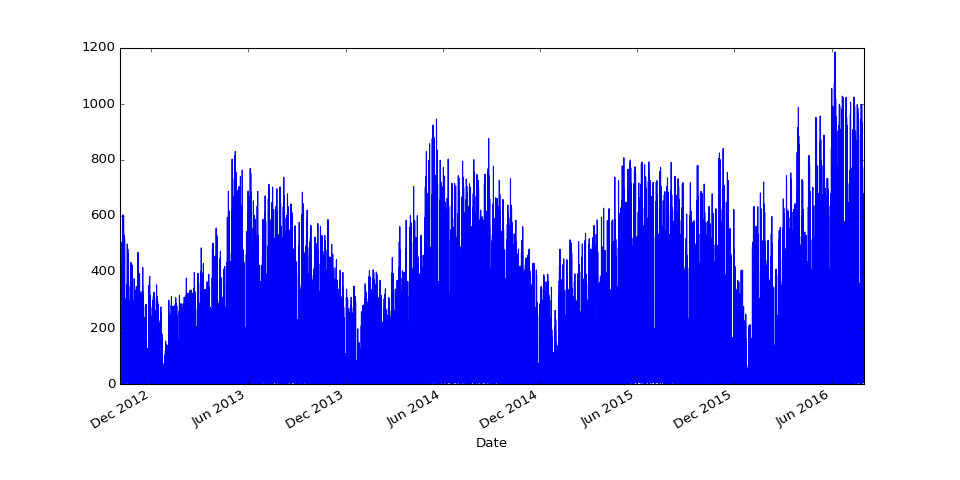

In [61]:
fig,ax=plt.subplots(figsize=(12,6))
df.plot(x='Date',y='total',legend=False,ax=ax)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<left><h2>To make parsing by date easier, add some columns that explicitly list year, month, hour, day of week</h2></left>
<p>Pandas recently added the handy dt accessor, which makes this very easy:  

<p>http://pandas.pydata.org/pandas-docs/version/0.15.0/basics.html#dt-accessor


</div>

In [62]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['hour']=df['Date'].dt.hour
df['dayofweek']=df['Date'].dt.weekday

In [63]:
df.tail()

,Date,northbound,southbound,total,year,month,hour,dayofweek
33547,2016-07-31 19:00:00,95.0,49.0,144.0,2016,7,19,6
33548,2016-07-31 20:00:00,73.0,31.0,104.0,2016,7,20,6
33549,2016-07-31 21:00:00,44.0,23.0,67.0,2016,7,21,6
33550,2016-07-31 22:00:00,25.0,14.0,39.0,2016,7,22,6
33551,2016-07-31 23:00:00,14.0,8.0,22.0,2016,7,23,6



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<left><h2>What is the most common hourly count?</h2></left>
<p>Make a histogram of hourly counts


</div>

<IPython.core.display.Javascript object>


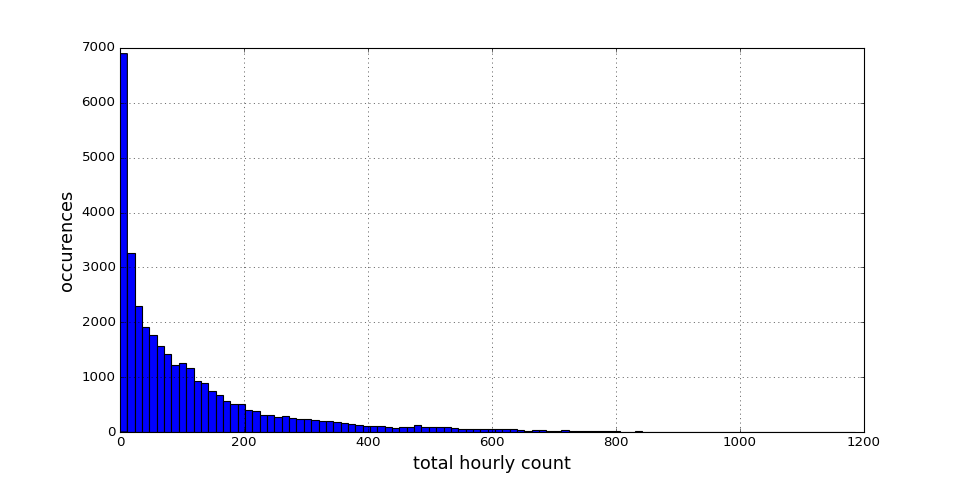

In [64]:
fig,ax=plt.subplots(figsize=(12,6))
df.total.hist(bins=100,ax=ax)
ax.set_xlabel('total hourly count',fontsize=16)
ax.set_ylabel('occurences',fontsize=16);


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<left><h2>Find the busiest month for total crossings</h2></left>
<p>One approach is to use nested for-loops to search over all combinations of unique years and months, checking against the maximum value on each iteration


</div>

In [65]:
max_month_year_total = (0,0,0)
for year in df.year.unique():
    for month in df.month.unique():
        total = df[(df.year == year) & (df.month == month)].total.sum()
        if total > max_month_year_total[2]:
            max_month_year_total = (month,year,total)
            
print("max month,year: ",max_month_year_total[0:2])
print("total crossings: ",max_month_year_total[2])

max month,year:  (6, 2016)
total crossings:  159168.0




<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Another approach is to use the Pandas "groupby" method


</div>

In [66]:
grouped = df.groupby(['year','month']).sum()
grouped

northbound  southbound     total  hour  dayofweek
year month                                                   
2012 10        33764.0     31931.0   65695.0  8004       2064
     11        26062.0     24585.0   50647.0  8280       2184
     12        18608.0     17761.0   36369.0  8556       2280
2013 1         22910.0     21974.0   44884.0  8556       2160
     2         25898.0     24129.0   50027.0  7728       2016
     3         34443.0     31646.0   66089.0  8557       2376
     4         37303.0     34695.0   71998.0  8280       2040
     5         56837.0     51737.0  108574.0  8556       2232
     6         51439.0     47841.0   99280.0  8280       2280
     7         60013.0     57961.0  117974.0  8556       2088
     8         53199.0     51350.0  104549.0  8556       2304
     9         41674.0     39055.0   80729.0  8280       2160
     10        42188.0     39164.0   81352.0  8556       2160
     11        30511.0     28759.0   59270.0  8280       2232
     12        22576.0     20977.0   43553.0  8556       2184
2014 1         30974.0     28899.0   59873.0  8556       2232
     2         24086.0     22939.0   47025.0  7728       2016
     3         32850.0     30644.0   63494.0  8557       2280
     4         44859.0     41996.0   86855.0  8280       2088
     5         61462.0     57182.0  118644.0  8556       2304
     6         56313.0     54594.0  110907.0  8280       2160
     7         61170.0     59499.0  120669.0  8556       2160
     8         56240.0     56250.0  112490.0  8556       2376
     9         51043.0     46515.0   97558.0  8280       2040
     10        44677.0     38507.0   83184.0  8556       2232
     11        27963.0     29027.0   56990.0  8280       2280
     12        23689.0     24818.0   48507.0  8556       2088
2015 1         35754.0     24876.0   60630.0  8556       2304
     2         32791.0     25868.0   58659.0  7728       2016
     3         34585.0     36559.0   71144.0  8557       2184
     4         43597.0     40100.0   83697.0  8280       2136
     5         55241.0     52534.0  107775.0  8556       2376
     6         57076.0     56641.0  113717.0  8280       2040
     7         55645.0     57135.0  112780.0  8556       2232
     8         50617.0     52734.0  103351.0  8556       2280
     9         44927.0     46213.0   91140.0  8280       2088
     10        41188.0     41815.0   83003.0  8556       2304
     11        56668.0     27822.0   84490.0  8280       2160
     12        21672.0     22320.0   43992.0  8556       2160
2016 1         51733.0     25678.0   77411.0  8556       2376
     2         29707.0     30674.0   60381.0  8004       2016
     3         69804.0     34377.0  104181.0  8557       2160
     4         46905.0     46734.0   93639.0  8280       2232
     5         56595.0     57564.0  114159.0  8556       2184
     6        107617.0     51551.0  159168.0  8280       2136
     7        105683.0     50373.0  156056.0  8556       2376

In [67]:
print("MAXIMUM MONTH:")
print(grouped.total[grouped.total == grouped.total.max()])

MAXIMUM MONTH:
year  month
2016  6        159168.0
Name: total, dtype: float64



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<left><h2>Make a bar plot showing crossings for each month</h2></left>
<p>Start with the "groupby" method


</div>

<IPython.core.display.Javascript object>


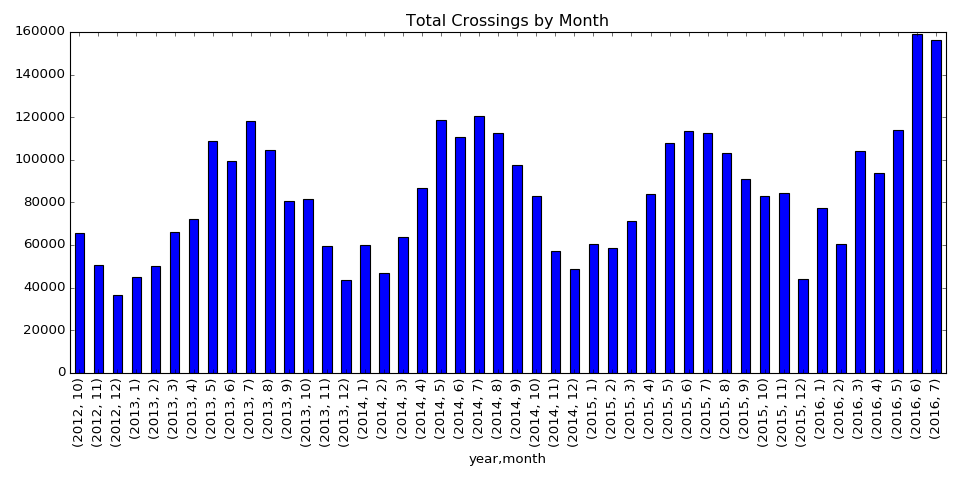

In [68]:
fig,ax=plt.subplots(figsize=(12,6))
grouped['total'].plot(kind='bar',ax=ax)
ax.set_title('Total Crossings by Month')
fig.tight_layout() #this will keep the xlabels from getting cut off


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>To gain a bit more control over the plot, make a temporary dataframe called "monthdf" that contains only the data we're interested in plotting

</div>

In [69]:
monthdf = pd.DataFrame(columns=('month', 'year', 'total'))
for year in df.year.unique():
    for month in df.month.unique():
        monthdf = monthdf.append(pd.DataFrame({'month':[month],
                                               'year':[year],
                                               'total':[df[(df.month==month) & (df.year==year)].total.sum()]}))


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Now make another version of the plot where months are grouped and color coded by year
</div>

<IPython.core.display.Javascript object>


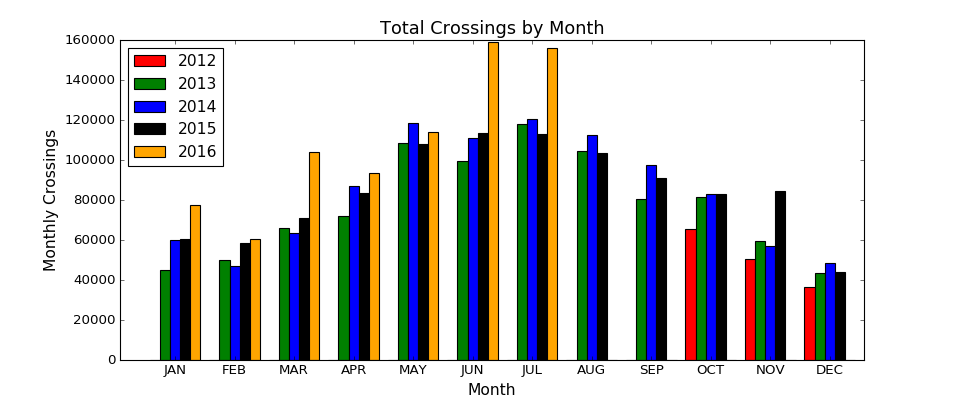

In [70]:
fig,ax=plt.subplots(figsize=(12,5))
colors = ['red','green','blue','black','orange']
bar_width = 0.85/len(df.year.unique())
monthdf = monthdf.sort_values(['year','month'])
for i,year in enumerate(df.year.unique()):
    x = np.sort(df.month.unique())+i*bar_width
    y = monthdf[monthdf.year == year].total
    ax.bar(x,y,width=bar_width,color=colors[i])

#The code below formats the plot to make it more readable. Try commenting it out to see what happens.
ax.set_xticklabels(pd.datetools.MONTHS)
ax.set_xticks(np.sort(df.month.unique())+0.85/2)
ax.legend(df.year.unique(),loc=2,fontsize=14)
ax.set_xlabel('Month',fontsize =14)
ax.set_ylabel('Monthly Crossings',fontsize=14)
ax.set_title('Total Crossings by Month',fontsize=16)
ax.set_xlim([0.5,13]);


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<left><h2>Make a bar plot showing crossings by day of week, seperated by year</h2></left>
<p>Again, make a temporary dataframe containing only the data we need for the plot

<p>Make sure to normalize the sum by the total number of days in each year!
</div>

In [71]:
daydf = pd.DataFrame(columns=('day', 'year', 'total'))
for year in df.year.unique():
    for day in df.dayofweek.unique():
        #count number of days in a given year to normalize the total properly:
        number_of_days = len(df[(df.dayofweek==day) & (df.year==year) & (df.hour ==0)])
        daydf = daydf.append(pd.DataFrame({'day':[day],
                                           'year':[year],
                                           'total':[df[(df.dayofweek==day) & 
                                                       (df.year==year)].total.sum()/number_of_days]}))


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Make a bar plot where days of week are grouped and color coded by year.  
<p>Again, make a temporary dataframe containing only the data we need for the plot


</div>

<IPython.core.display.Javascript object>


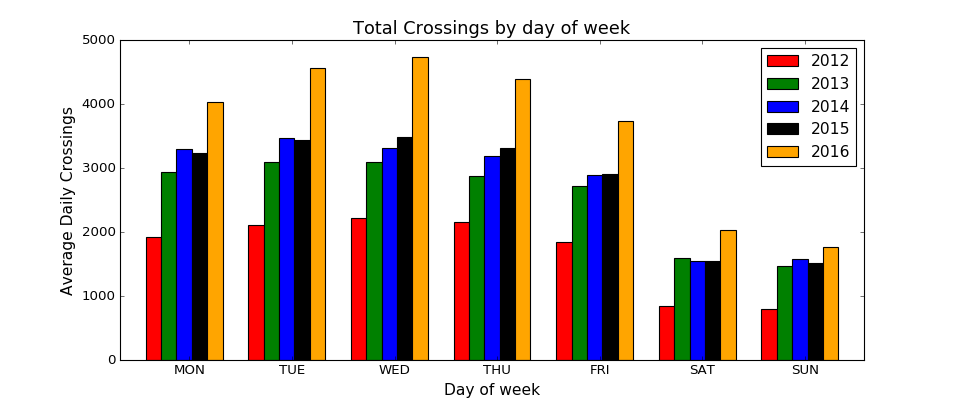

(-0.25, 7)

In [72]:
fig,ax=plt.subplots(figsize=(12,5))
colors = ['red','green','blue','black','orange']
bar_width = 0.75/len(df.year.unique())
daydf = daydf.sort_values(['year','day'])
for i,year in enumerate(df.year.unique()):
    x = np.sort(df.dayofweek.unique())+i*bar_width
    y = daydf[daydf.year == year].total
    ax.bar(x,y,width=bar_width,color=colors[i])

ax.set_xticklabels(pd.datetools.DAYS)
ax.set_xticks(np.sort(df.dayofweek.unique())+0.85/2)
ax.legend(df.year.unique(),loc=1,fontsize=14)
ax.set_xlabel('Day of week',fontsize =14)
ax.set_ylabel('Average Daily Crossings',fontsize=14)
ax.set_title('Total Crossings by day of week',fontsize=16)
ax.set_xlim([-0.25,7]);
# ax.set_ylim([0,4000]);